In [1]:
import requests
import time

if __name__ == '__main__':
    headers = {}
    keyvalue = {}
    url = 'http://data.stats.gov.cn/easyquery.htm'
    headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '\
                            'AppleWebKit/537.36 (KHTML, like Gecko) '\
                            'Chrome/70.0.3538.77 Safari/537.36'
                            
    keyvalue['m'] = 'QueryData'
    keyvalue['dbcode'] = 'hgnd'
    keyvalue['rowcode'] = 'zb'
    keyvalue['colcode'] = 'sj'
    keyvalue['wds'] = '[]'
    keyvalue['dfwds'] = '[{"wdcode":"zb","valuecode":"A0301"},{"wdcode":"sj","valuecode":"LAST20"}]'
    tim = int(round(time.time() * 1000))
    keyvalue['k1'] = str(tim)
    r = requests.get(url, headers=headers, params=keyvalue)

In [2]:
r = r.json()

In [3]:
p_t = {}
p_m = {}
p_w = {}
list = r['returndata']['datanodes']
for datanode in list:
    code = datanode['code']
    year = int(code.split('.')[-1])
    if 'A030101' in code:
        p_t[year] = datanode['data']['data']
    if 'A030102' in code:
        p_m[year] = datanode['data']['data']
    if 'A030103' in code:
        p_w[year] = datanode['data']['data']

In [4]:
import sqlite3
conn = sqlite3.connect('population.db')
print("Opened database successfully")
c = conn.cursor()
c.execute('''CREATE TABLE PT
       (ID INT PRIMARY KEY     NOT NULL,
       YEAR        TEXT    NOT NULL,
       POPULATION        TEXT    NOT NULL);''')
print("Total Population Table Created!")
c.execute('''CREATE TABLE PM
       (ID INT PRIMARY KEY     NOT NULL,
       YEAR        TEXT    NOT NULL,
       POPULATION        TEXT    NOT NULL);''')
print("Male Population Table Created!")
c.execute('''CREATE TABLE PW
       (ID INT PRIMARY KEY     NOT NULL,
       YEAR        TEXT    NOT NULL,
       POPULATION        TEXT    NOT NULL);''')
print("Female Population Table Created!")
conn.commit()
conn.close()

Opened database successfully
Total Population Table Created!
Male Population Table Created!
Female Population Table Created!


In [5]:
# Insert data
conn = sqlite3.connect('population.db')
c = conn.cursor()

# make sure you already have the dict CITIES in the memory
for i, k in enumerate(p_t):
    sql = "INSERT INTO PT (ID,YEAR,POPULATION) \
      VALUES (%d, %d, %d);" % (i, k, p_t[k])
    c.execute(sql)
    sql = "INSERT INTO PM (ID,YEAR,POPULATION) \
      VALUES (%d, %d, %d);" % (i, k, p_m[k])
    c.execute(sql)
    sql = "INSERT INTO PW (ID,YEAR,POPULATION) \
      VALUES (%d, %d, %d);" % (i, k, p_w[k])
    c.execute(sql)

conn.commit()
print("Records created successfully")
conn.close()

Records created successfully


In [7]:
conn = sqlite3.connect('population.db')
c = conn.cursor()
c.execute("select * from PT;")
data = c.fetchall()
conn.commit()
conn.close()
year = []
p = []

for item in data:
    year.append(int(item[1]))
    p.append(int(item[2]))

In [8]:
import matplotlib.pyplot as plt

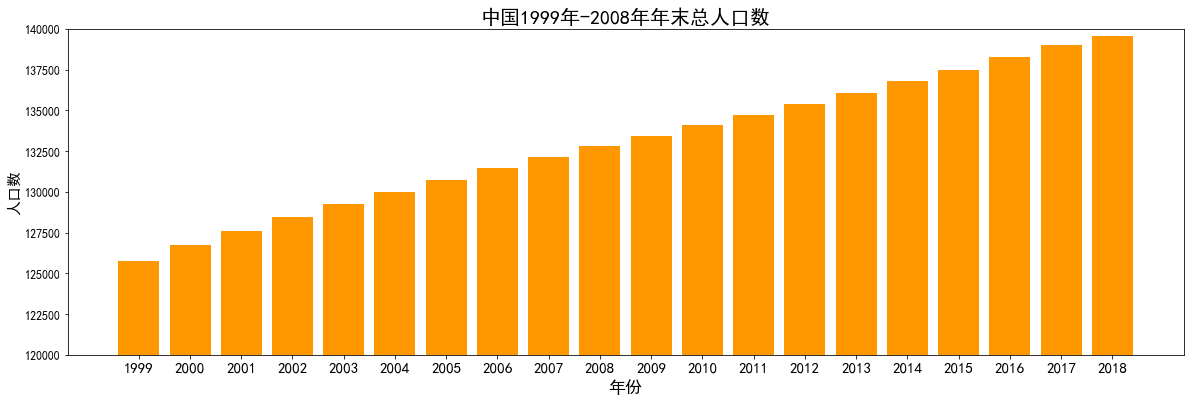

In [48]:
import numpy as np
from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=[20, 6])
plt.ylim([120000,140000])
plt.bar(year, p, facecolor='#ff9800')
xtick = np.arange(1999,2019)
ytick = np.arange(120000, 140001, 2500)
plt.xticks(xtick, size=15)
plt.yticks(ytick, size=12)
plt.xlabel('年份', size=17)
plt.ylabel('人口数', size=15)
plt.title('中国1999-2008年年末总人口数', size=20)
plt.show()

In [71]:
# show data
conn = sqlite3.connect('population.db')
c = conn.cursor()
c.execute("select * from PM;")
data1 = c.fetchall()
c.execute("select * from PW;")
data2 = c.fetchall()
conn.commit()
conn.close()
p_m = []
p_w = []

for i in range(len(data1)):
    p_m.append(int(data1[i][2]))
    p_w.append(int(data2[i][2]))
p_m = np.array(p_m) / np.array(p)
p_w = np.array(p_w) / np.array(p)

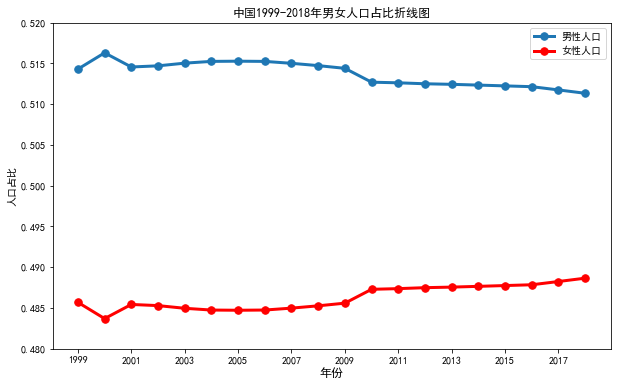

In [80]:
plt.figure(figsize=[10, 6])
plt.plot(year, p_m, marker='.', markersize=15, linewidth=3, label='男性人口')
plt.plot(year, p_w, marker='.', markersize=15, linewidth=3, color='r', label='女性人口')
plt.ylim([0.48, 0.52])
plt.legend(loc='upper right')
xtick = np.arange(1999, 2019, 2)
plt.xticks(xtick)
plt.xlabel('年份', size=12)
plt.ylabel('人口占比')
plt.title('中国1999-2018年男女人口占比折线图')
plt.show()